<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2021 - Homework 02</h1>

<h3 style="color:blue">2021-05-31</h3>

<h3 style="color:blue"> Authors: David Farré Gil, Blai Ras Jimenez, Irene Bonafonte Pardàs </h3>

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\expdist{\operatorname{Exp}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
***

## Data Reading

In [1]:
data <- read.csv("aug_train.csv")
test <- read.csv("aug_test.csv")

In [2]:
test_response <- read.csv("Test_Response.csv")

In [3]:
test$Response <- test_response$Response

## Data Analysis

### Variables

01. `id`:        id of the subject.   
02. `Gender`:        Sex of the subject.
03. `Age`:         Age of the subject.
04. `Driving License`:      Whether if the subject has or not a driver's license.
05. `Region_Code`:          Coded region name.
06. `Previously_Insured`:      Whether if the subject has already a health insurance.
07. `Vehicle_Age`:  Number of years of the subject's car.
08. `Vehicle_Damage`:   Measure of detriment of the subject's car.
09. `Annual_Premium`:          Number of citations in total.
10. `Policy_Sales_Channel`:      Sum of money that the subject needs to pay regularly to an insurance company.
11. `Vintage`:     Days the subject is insured until now.
12. `Response`: Whether the subject said yes or no to getting a vehicle insurance.

As we can see, we will get rid of the variables `id`, `Region_Code` and `Policy_Sales_Channel` since they do not bring any substantial information towards the goal of predicting whether a customer would be interested in Vehicle Insurance. Even if they did, they should not be used towards that goal, it may even be a case of spurious correlation.

In [4]:
data <- data[c("Gender","Age","Driving_License","Previously_Insured","Vehicle_Age","Vehicle_Damage","Annual_Premium","Vintage","Response")]
test <- test[c("Gender","Age","Driving_License","Previously_Insured","Vehicle_Age","Vehicle_Damage","Annual_Premium","Vintage","Response")]

In [5]:
str(data)

'data.frame':	382154 obs. of  9 variables:
 $ Gender            : chr  "Male" "Male" "Female" "Female" ...
 $ Age               : int  22 42 66 22 28 25 51 38 45 42 ...
 $ Driving_License   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Previously_Insured: int  1 0 0 0 1 1 0 1 0 0 ...
 $ Vehicle_Age       : chr  "< 1 Year" "1-2 Year" "1-2 Year" "< 1 Year" ...
 $ Vehicle_Damage    : chr  "No" "Yes" "Yes" "No" ...
 $ Annual_Premium    : num  2630 43327 35841 27645 29023 ...
 $ Vintage           : int  16 135 253 69 211 23 209 51 262 217 ...
 $ Response          : int  0 0 0 0 0 0 0 0 0 1 ...


In [6]:
str(test)

'data.frame':	78273 obs. of  9 variables:
 $ Gender            : chr  "Female" "Female" "Male" "Male" ...
 $ Age               : int  34 55 39 28 24 33 50 55 60 44 ...
 $ Driving_License   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Previously_Insured: int  1 0 1 1 0 1 0 0 1 1 ...
 $ Vehicle_Age       : chr  "1-2 Year" "> 2 Years" "1-2 Year" "1-2 Year" ...
 $ Vehicle_Damage    : chr  "No" "Yes" "No" "No" ...
 $ Annual_Premium    : num  38244 37577 24578 40507 36783 ...
 $ Vintage           : int  146 109 63 129 201 274 92 87 214 12 ...
 $ Response          : int  0 0 0 0 0 0 0 1 0 0 ...


As we can see, there's a few categorical columns. For the sake of the model creation and training, we will convert them to numerical, e.g. ``Female`` is coded to ``1`` and ``Male`` is coded to  ``0``, thanks to the ``preprocess`` function below.

In [7]:
preprocess <- function(data) {
    data$Vehicle_Age <- as.numeric(factor(data$Vehicle_Age, levels=c('< 1 Year','1-2 Year','> 2 Years')))
    data$Vehicle_Damage <- as.numeric(factor(data$Vehicle_Damage, levels=c('No','Yes'))) 
    data$Gender <- as.numeric(factor(data$Gender))
    return(data)
}

In [8]:
data <- preprocess(data)
test <- preprocess(test)

In [9]:
str(data)

'data.frame':	382154 obs. of  9 variables:
 $ Gender            : num  2 2 1 1 2 1 2 2 1 2 ...
 $ Age               : int  22 42 66 22 28 25 51 38 45 42 ...
 $ Driving_License   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Previously_Insured: int  1 0 0 0 1 1 0 1 0 0 ...
 $ Vehicle_Age       : num  1 2 2 1 1 1 2 2 2 2 ...
 $ Vehicle_Damage    : num  1 2 2 1 1 1 2 1 2 2 ...
 $ Annual_Premium    : num  2630 43327 35841 27645 29023 ...
 $ Vintage           : int  16 135 253 69 211 23 209 51 262 217 ...
 $ Response          : int  0 0 0 0 0 0 0 0 0 1 ...


In [12]:
data[1:5,]

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2,22,1,1,1,1,2630,16,0
2,2,42,1,0,2,2,43327,135,0
3,1,66,1,0,2,2,35841,253,0
4,1,22,1,0,1,1,27645,69,0
5,2,28,1,1,1,1,29023,211,0


Let's check the distribution of each variable in the data set. We can see a strong unbalance for many of the variables, including Response (which is the most concerning one, as it is the variable we want to predict), vehicle age and driving license. 

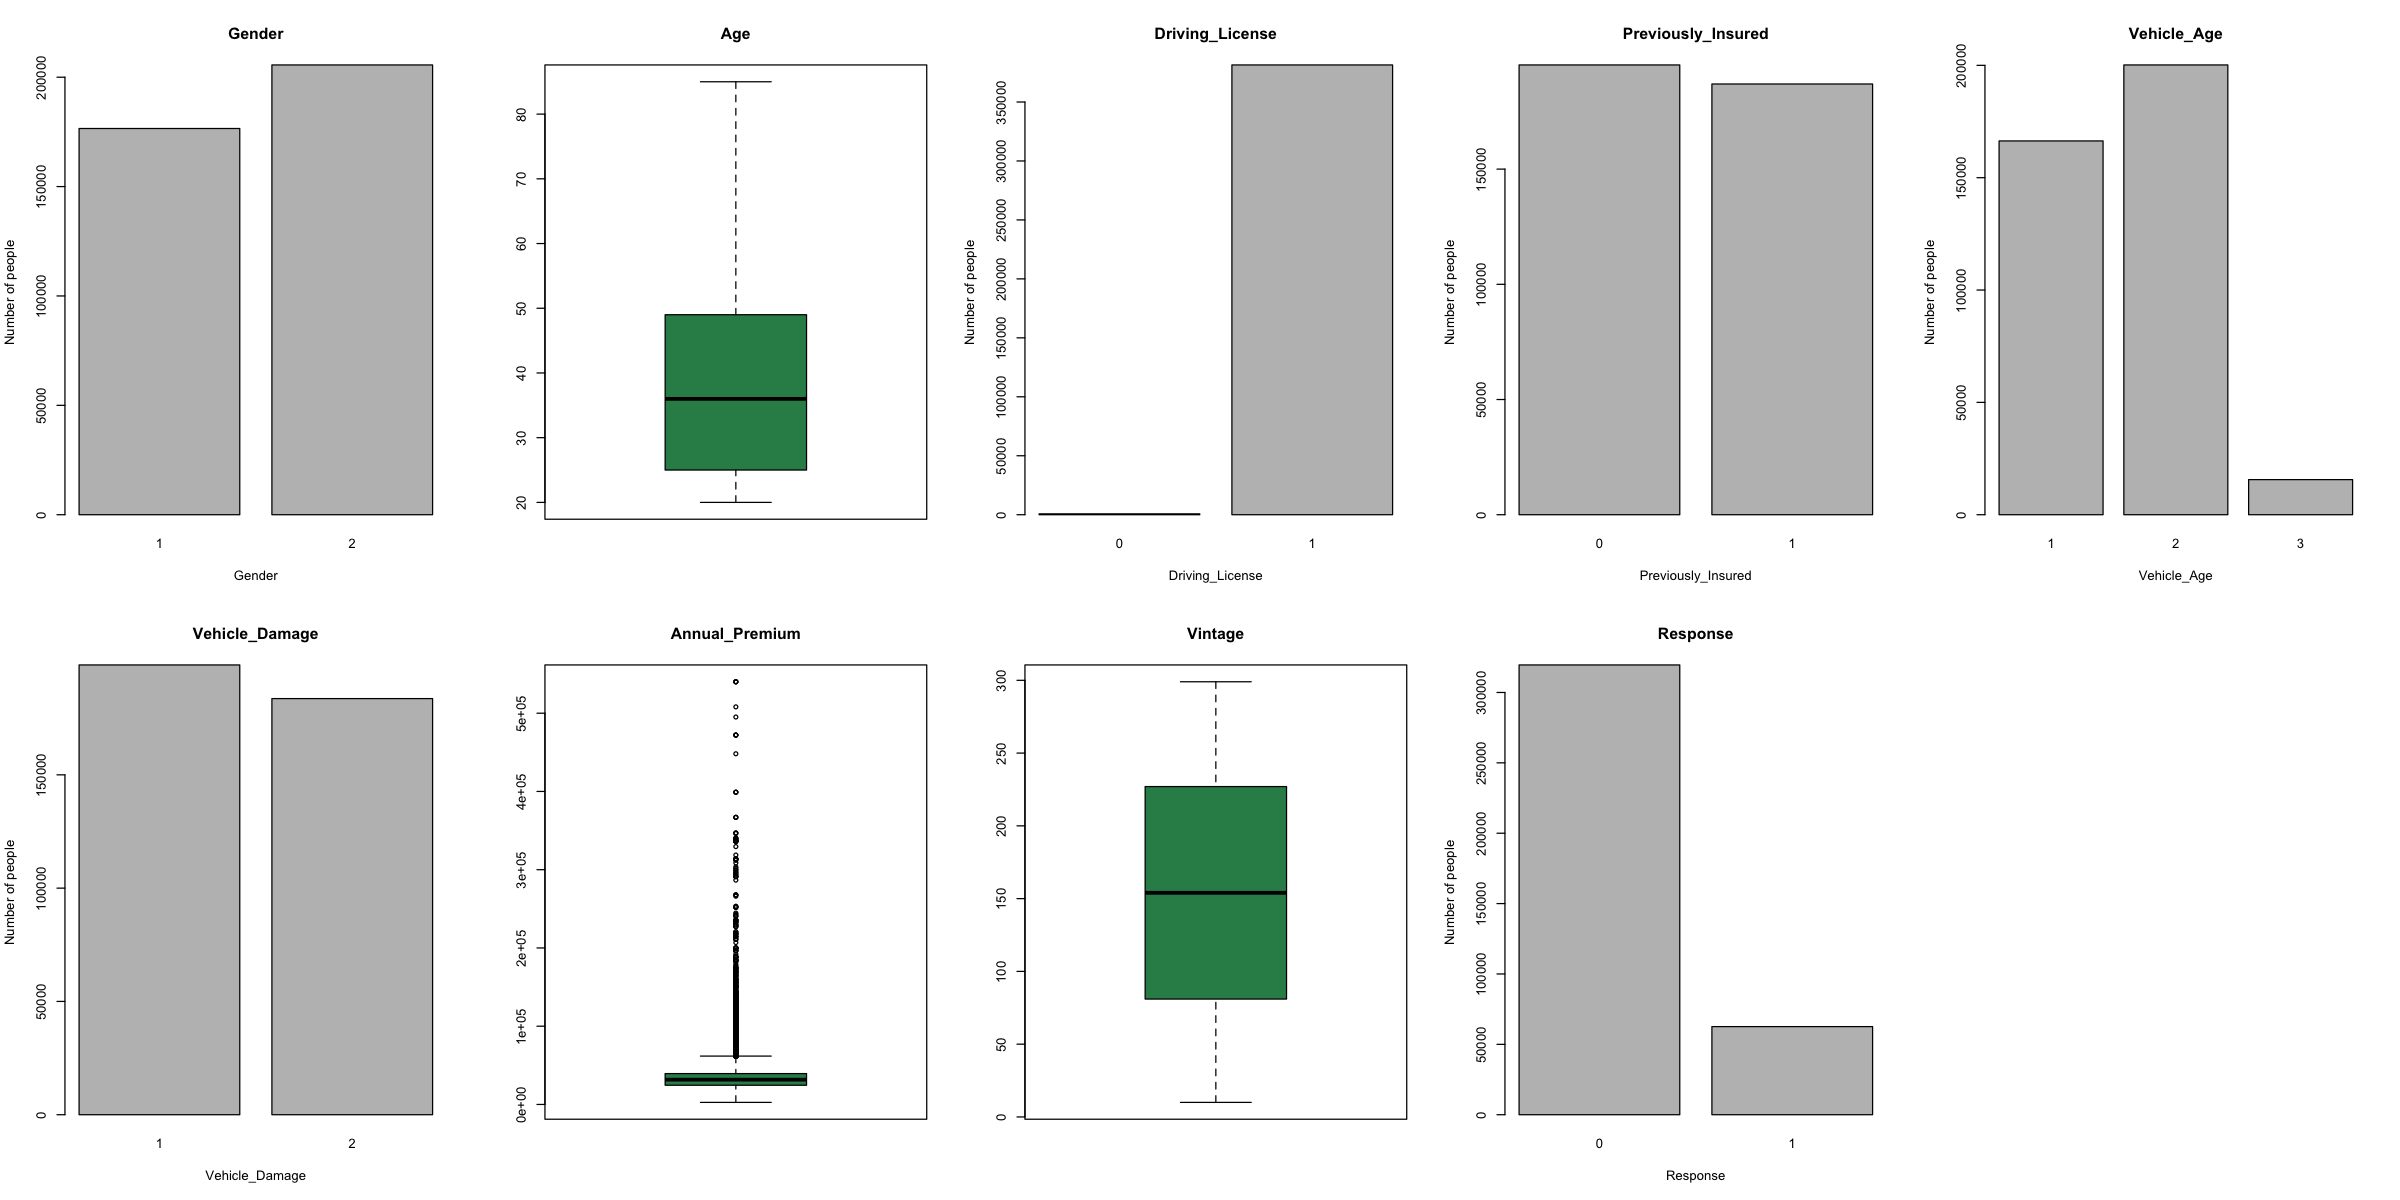

In [10]:
options(repr.plot.width=20,repr.plot.height=10)
par(mfrow=c(2,5))
for (i in 1:ncol(data)) {
    if (length(unique(data[,i])) > 3){
        boxplot(data[,i],col="seagreen",main=colnames(data)[i])
    } else {
        barplot(table(data[,i]), ylab="Number of people", xlab=colnames(data)[i], main=colnames(data)[i])
    }
}

And now, the possible correlation that might occurr betwen this variables. We only study this among the numerical variables (those with more than 3 unique levels), excluding categorical variables. As manny of our variables are categorical, this analysis is not very insightful.

In [11]:
numeric_cols <- apply(data,MARGIN=2,function(x) length(unique(x)) > 3)
round(cor(data[,numeric_cols]),2)

,Age,Annual_Premium,Vintage
Age,1.00,0.07,0
Annual_Premium,0.07,1.00,0
Vintage,0.00,0.00,1


In [12]:
#16 min, do not load!!!


#options(repr.plot.width=10,repr.plot.height=10)
#pairs(data[,numeric_cols],col="seagreen")

Do we have to deal with null values in the dataset? No.

In [13]:
sum(is.na(data))
sum(is.na(test))

[1] 0

[1] 0

A common practice in Machine Learning is perform feature scaling, which helps most models to converge more quickly towards the minima. We can achieve this with the function ``scale``, which centers the variable to 0 mean and unit variance. We will scale all variables but response, the target variable.

In [15]:
data[,-9] <-  as.data.frame(scale(data[,-9]))
test[,-9] <-  as.data.frame(scale(test[,-9]))

data[1:5,]

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.9266587,-1.0866095,0.04353721,1.0218731,-1.0694836,-0.9618716,-1.64587604,-1.6503165,0
2,0.9266587,0.2268557,0.04353721,-0.9785925,0.6965558,1.0396371,0.73942256,-0.2291683,0
3,-1.0791432,1.8030141,0.04353721,-0.9785925,0.6965558,1.0396371,0.30065937,1.1800376,0
4,-1.0791432,-1.0866095,0.04353721,-0.9785925,-1.0694836,-0.9618716,-0.17971774,-1.0173681,0
5,0.9266587,-0.6925699,0.04353721,1.0218731,-1.0694836,-0.9618716,-0.09895155,0.6784558,0


Let's look at this class imbalance we've been told:

In [16]:
table(data$Response)


     0      1 
319553  62601 

In [17]:
round(table(data$Response)/nrow(data)*100,2)


    0     1 
83.62 16.38 

Huge! Our first approach to deal with this problem is resampling with the function ``resample`` that we have below. It takes as parameter the amount of samples we want from each class and returns the filtered dataframe. With this approach, we balance the dataset, because we get the same number of samples from the positive than from the negative class.

We have selected this simple approach, and not more sofisticated methods such as SMOTE for the following reason: SMOTE deals with the class imbalance by oversampling the minority class, doing data augmentation in a very smart manner. However, in our case, we have more samples than those we can process, and we need to reduce the training dataset. For this reason, we think that it is sufficient in our case to do undersampling. When undersampling, we can select the same numbers of samples from both classes and, so, the class imbalance is solved. 

In [18]:
resample <- function(data,size) {
    total = size * 2
    if (total > nrow(data)) {
        cat("Not enough data to create a dataframe of size ",total)
        return(data)
    } else if (size > 62601) {
        print("Not enough samples!")
        return(data)
    }
    negative <- sample(x=which(data$Response == 0), size=size, replace=FALSE)
    positive <- sample(x=which(data$Response == 1), size=size, replace=FALSE)
    resampled_idx <- c(negative, positive)
    return(data[resampled_idx, ])
}

In [19]:
df <- resample(data,1000)
dim(df)
table(df$Response)

[1] 2000    9


   0    1 
1000 1000 

## Model creation

Below we can observe each model creation. We've decided to use ``rstanarm``, ``rstan``. ``JAGS`` and ``MCMCpack``.

### Frequentist approach

We will start fitting a logistic regression with the frequentist approach. We will do this in order to get a prior for the intercept and also to get a first idea on the minimum number of samples we need to solve the problem in a estable manner. This first model will also be useful to compare the results we obtain with the Bayesian approach.

In [40]:
# Repeat 4 times to compare results
for (i in 1:4){
    
    # Select samples
    max_size <- min(table(data$Response))
    n <- max_size*0.02
    df <- resample(data,n)
    if (i == 1){
        print('Matrix dimensions: ')
        print(dim(df))
        print('Number of positive and negative cases: ')
        print(table(df$Response))
    }

    # Fit logistic regression
    formula <- as.formula(paste0('Response ~ ',paste(colnames(df)[-ncol(df)],collapse=' + ')))
    lm.m <- glm(formula, data = df, family = "binomial")
    
    # Summary of the model
    print(summary(lm.m))
}

[1] "Matrix dimensions: "
[1] 2504    9
[1] "Number of positive and negative cases: "

   0    1 
1252 1252 

Call:
glm(formula = formula, family = "binomial", data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.25284  -0.00009   0.19301   0.76898   2.19557  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -9.43425  187.83968  -0.050 0.959943    
Gender               0.18230    0.05490   3.321 0.000899 ***
Age                 -0.36738    0.08658  -4.243 2.20e-05 ***
Driving_License      0.06168    0.05389   1.145 0.252377    
Previously_Insured  -9.07990  191.94882  -0.047 0.962271    
Vehicle_Age          0.60524    0.08278   7.312 2.64e-13 ***
Vehicle_Damage       1.23714    0.14461   8.555  < 2e-16 ***
Annual_Premium      -0.01243    0.05605  -0.222 0.824442    
Vintage             -0.02141    0.05559  -0.385 0.700177    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion 

By manually inspecting the results, we can see that they are quite inestable. The significance of each variable changes strongly based on the selected samples. For instance, gender was very significant at the first iteration, with a 0.182 estimate for the change of odds, but unsignificant in the other sample sets, with estimates as low as 0.03. We have tried again by increasing progressively the sample sizes (results not shown) and show here the results for the smallest sample size we were satisfied with.

In [20]:
# Repeat 4 times to compare results
for (i in 1:4){
    
    # Select samples
    max_size <- min(table(data$Response))
    n <- max_size*0.2
    df <- resample(data,n)
    if (i == 1){
        print('Matrix dimensions: ')
        print(dim(df))
        print('Number of positive and negative cases: ')
        print(table(df$Response))
    }

    # Fit logistic regression
    formula <- as.formula(paste0('Response ~ ',paste(colnames(df)[-ncol(df)],collapse=' + ')))
    lm.m <- glm(formula, data = df, family = "binomial")
    
    # Summary of the model
    print(summary(lm.m))
}

[1] "Matrix dimensions: "
[1] 25040     9
[1] "Number of positive and negative cases: "

    0     1 
12520 12520 

Call:
glm(formula = formula, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5351  -0.0925   0.1567   0.7540   3.5978  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.50156    0.09000 -27.795  < 2e-16 ***
Gender              0.03744    0.01774   2.110 0.034825 *  
Age                -0.36113    0.02724 -13.257  < 2e-16 ***
Driving_License     0.06766    0.02011   3.364 0.000769 ***
Previously_Insured -2.02610    0.09364 -21.637  < 2e-16 ***
Vehicle_Age         0.62275    0.02670  23.324  < 2e-16 ***
Vehicle_Damage      1.26119    0.04718  26.731  < 2e-16 ***
Annual_Premium      0.05733    0.01683   3.407 0.000657 ***
Vintage             0.02394    0.01742   1.375 0.169258    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for 

In [21]:
# Comparing the model to the null model
anova(lm.m)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,25039,34712.81
Gender,1,2.108316e+02,25038,34501.98
Age,1,8.202273e+02,25037,33681.75
Driving_License,1,4.101105e+01,25036,33640.74
Previously_Insured,1,1.207965e+04,25035,21561.09
Vehicle_Age,1,8.431588e+02,25034,20717.93
Vehicle_Damage,1,1.000102e+03,25033,19717.83
Annual_Premium,1,1.648264e+01,25032,19701.35
Vintage,1,7.543836e-04,25031,19701.34


The results seem to be quite stable now, both in terms of estimates and p-values. Therefore (if feasible), we will keep using 20% of the samples in the experiments below. We will keep the intercept (b0 coeficient) to use it to center the intercept Bayesian prior.

In [22]:
b0_hat = as.numeric(coef(lm.m)[1])
round(b0_hat,4)

[1] -2.5802

### Stan

In [23]:
#install.packages("rstan", repos= "https://cloud.r-project.org")
options(mc.cores = parallel::detectCores())
require(rstan)
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=corei7 -mtune=corei7')

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



In [25]:
# Subsample dataset
max_size <- min(table(data$Response))
n <- max_size*0.01
#n <- max_size*0.2
df <- resample(data,n)
n <- nrow(df) # Number of samples
p <- ncol(df) - 1 # Number of predictors (we also have response in df)
n_test <- 300
df_test = test[1:n_test,-ncol(test)] # FER BÉ!!!
y_test = test[1:n_test,'Response']
print(n)
print(p)

[1] 1252
[1] 8


In [52]:
logit.stan.model <- "
    data{
        int<lower=1> n; //Number of data items
        int<lower=1> p; //Number of coefficients
        matrix[n,p] X; //Predictors matrix
        int<lower=0,upper=1> y[n]; //Outcome vector
        real b0_hat;
        int<lower = 1> n_test;
        matrix[n_test,p] x_test; //Predictors matrix for test

    }
    parameters{
        real b0;
        vector[p] b;
    }
    model{
        // Model
        y ~ bernoulli_logit(b0 + X*b);

        // Priors
        b0 ~ normal(b0_hat,1);

        for(i in 1:p)
            b[i] ~ normal(0,3);

    }

    generated quantities {
        vector[n_test] y_test;
        y_test=inv_logit(b0 + x_test*b);
    //y_test = bernoulli_rng(inv_logit(b0 + x_test*b));
       // for (i in 1:n_test)
       //     y_test[n]=bernoulli_rng(inv_logit(b0 + x_test[i,:]*b));
    }   
"
logit.stan.data <- list(n=n, p=p, y=df$Response, X=as.matrix(df[,-ncol(df)]), b0_hat=b0_hat,
                       x_test=as.matrix(df_test), n_test=n_test)

In [ ]:
logit.stan <- stan(model_code = logit.stan.model, data = logit.stan.data, iter = 2500,
             chains = 3, verbose = FALSE, seed=101, warmup=500)
print(logit.stan)

In [59]:
# Store parameters and predictions distribution
logit.stan.summary <- summary(logit.stan)$summary
logit.stan.preds <- logit.stan.summary[grepl('y', row.names(logit.stan.summary)), ]
logit.stan.summary <- logit.stan.summary[grepl('b', row.names(logit.stan.summary)), ]
logit.stan.summary

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
b0,-3.38551548,0.011820477,0.60127918,-4.69504903,-3.761557347,-3.33065248,-2.94505372,-2.3812976,2587.512,1.0004827
b[1],0.09910195,0.001151172,0.08076299,-0.05749534,0.044473603,0.09898878,0.15239875,0.2582154,4922.033,1.0000975
b[2],-0.46714792,0.001962276,0.12285839,-0.70881342,-0.548534599,-0.46626226,-0.38270445,-0.2285364,3920.029,0.9996304
b[3],2.18740075,0.035775070,1.74893719,-0.03188933,0.813484298,1.83357366,3.19028085,6.3732203,2389.942,1.0008290
b[4],-2.85197800,0.012901851,0.63016941,-4.24509053,-3.264386517,-2.78703312,-2.39089640,-1.7899117,2385.671,1.0009890
b[5],0.50463649,0.001912802,0.12101925,0.27160313,0.421231313,0.50549302,0.58509704,0.7440053,4002.845,0.9997246
b[6],1.33909360,0.003268777,0.20692526,0.96151530,1.196458925,1.33137715,1.47198218,1.7717892,4007.343,1.0000965
b[7],0.05881164,0.001103643,0.07748409,-0.08978768,0.006751803,0.05769497,0.11046075,0.2103406,4929.104,0.9998438
b[8],0.03491346,0.001068260,0.07724584,-0.11576315,-0.018467460,0.03426934,0.08757214,0.1878170,5228.735,1.0001151


In [31]:
summary(lm.m)


Call:
glm(formula = formula, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4409  -0.0795   0.1615   0.7463   3.6341  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.62945    0.10450 -25.161  < 2e-16 ***
Gender              0.05725    0.01783   3.211  0.00132 ** 
Age                -0.43758    0.02715 -16.119  < 2e-16 ***
Driving_License     0.05163    0.01992   2.592  0.00954 ** 
Previously_Insured -2.24852    0.10853 -20.719  < 2e-16 ***
Vehicle_Age         0.66319    0.02703  24.535  < 2e-16 ***
Vehicle_Damage      1.20162    0.04466  26.908  < 2e-16 ***
Annual_Premium      0.02332    0.01705   1.368  0.17147    
Vintage            -0.02760    0.01763  -1.565  0.11748    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 34713  on 25039  degrees of freedom
Residual deviance: 19718  on

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



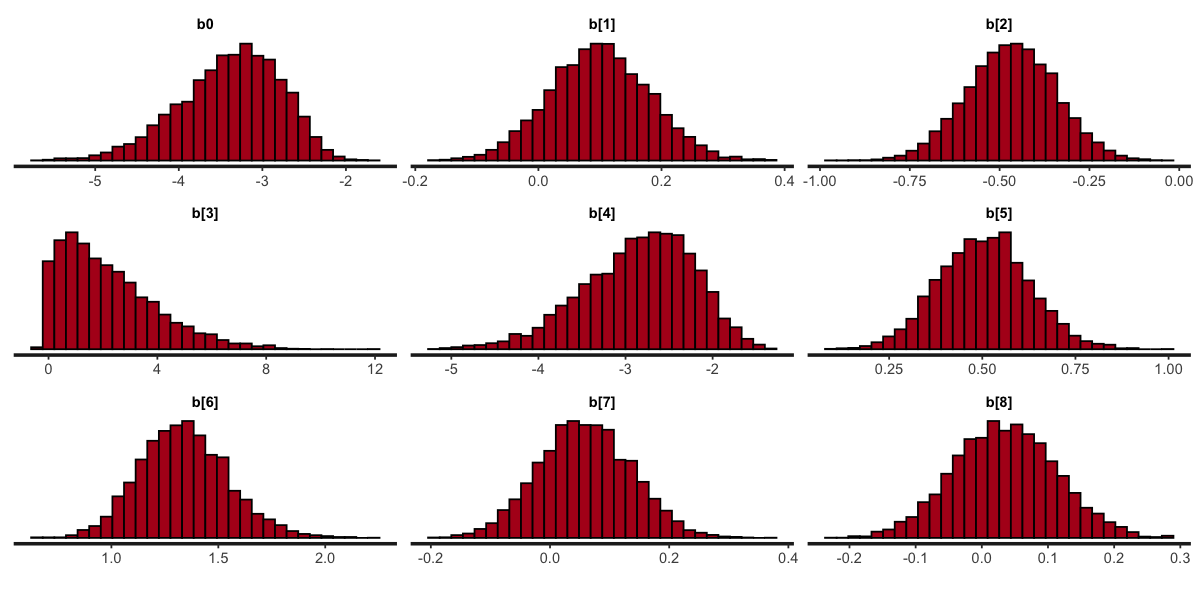

In [66]:
options(repr.plot.width=10,repr.plot.height=5)
stan_hist(logit.stan, pars=c("b0","b"))

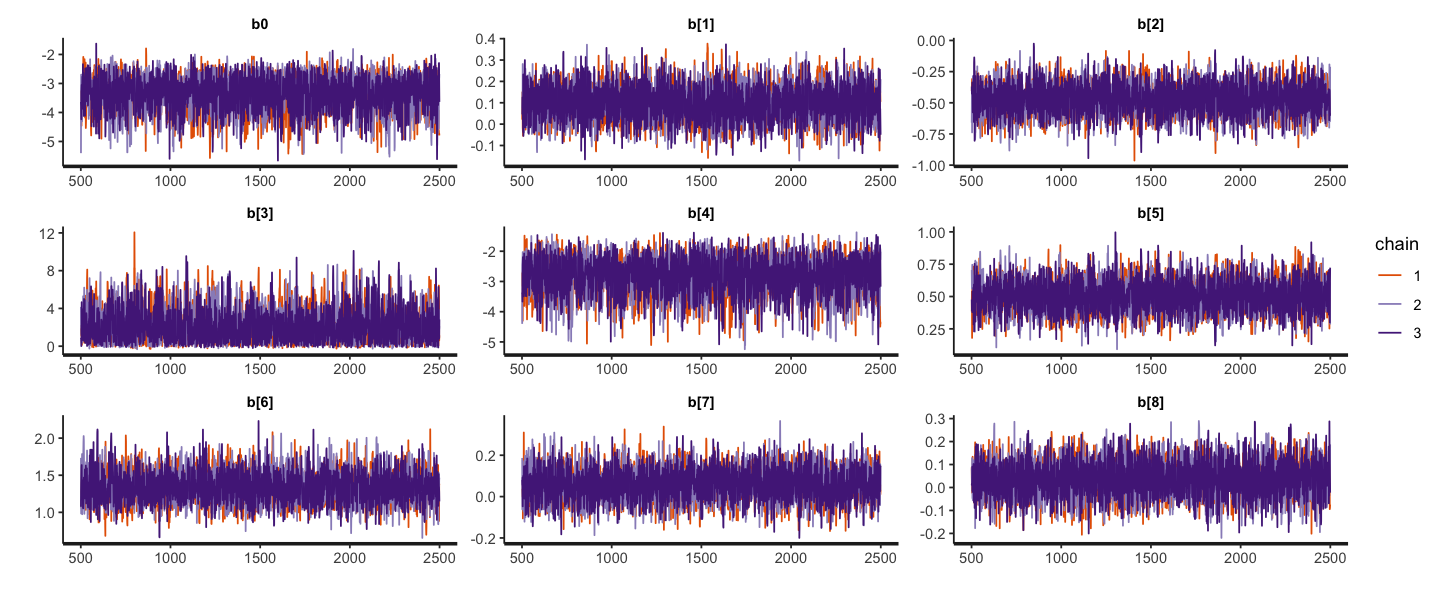

In [67]:
options(repr.plot.width=12, repr.plot.height=5)
stan_trace(logit.stan, pars=c("b0","b"))

[1] 0.6766667

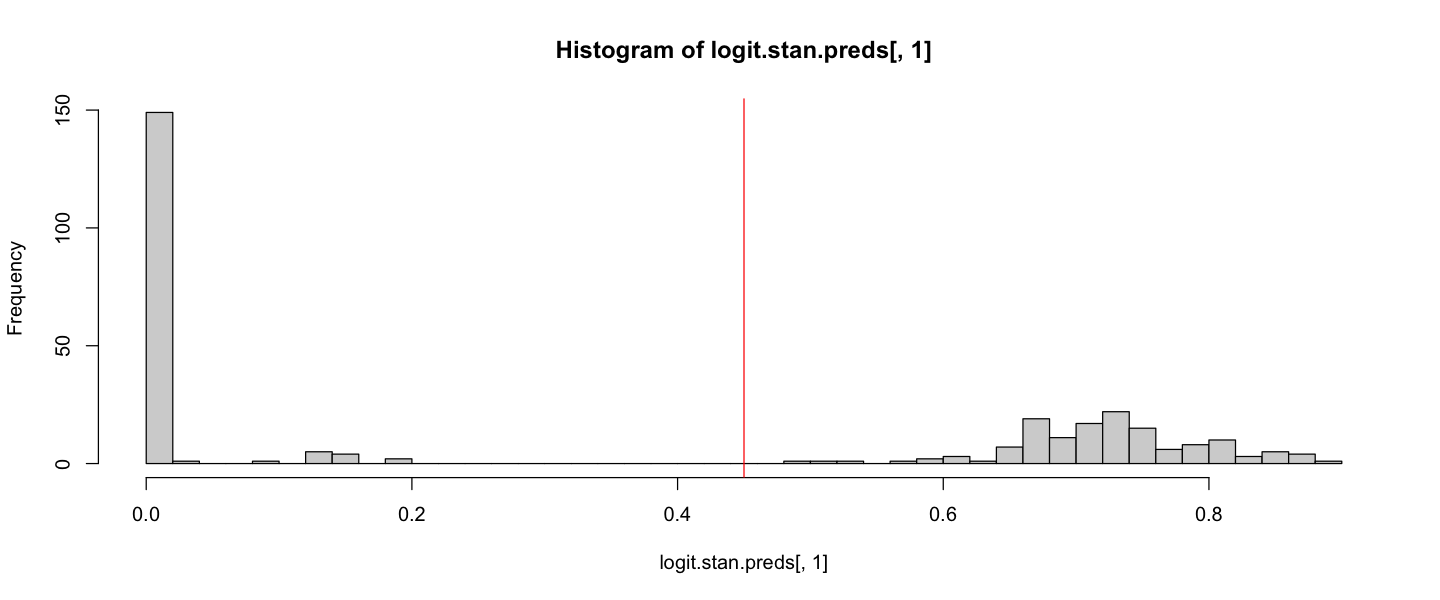

In [80]:
hist(logit.stan.preds[,1], breaks=50)
abline(v=0.45, col='red')
# Assign probabilit < 0.45 to class 0, and >= 0.45 to class 1
y_test_pred = ifelse(logit.stan.preds[,1] < 0.45, 0, 1)
# Compute accuracy
sum(y_test_pred == y_test)/length(y_test)

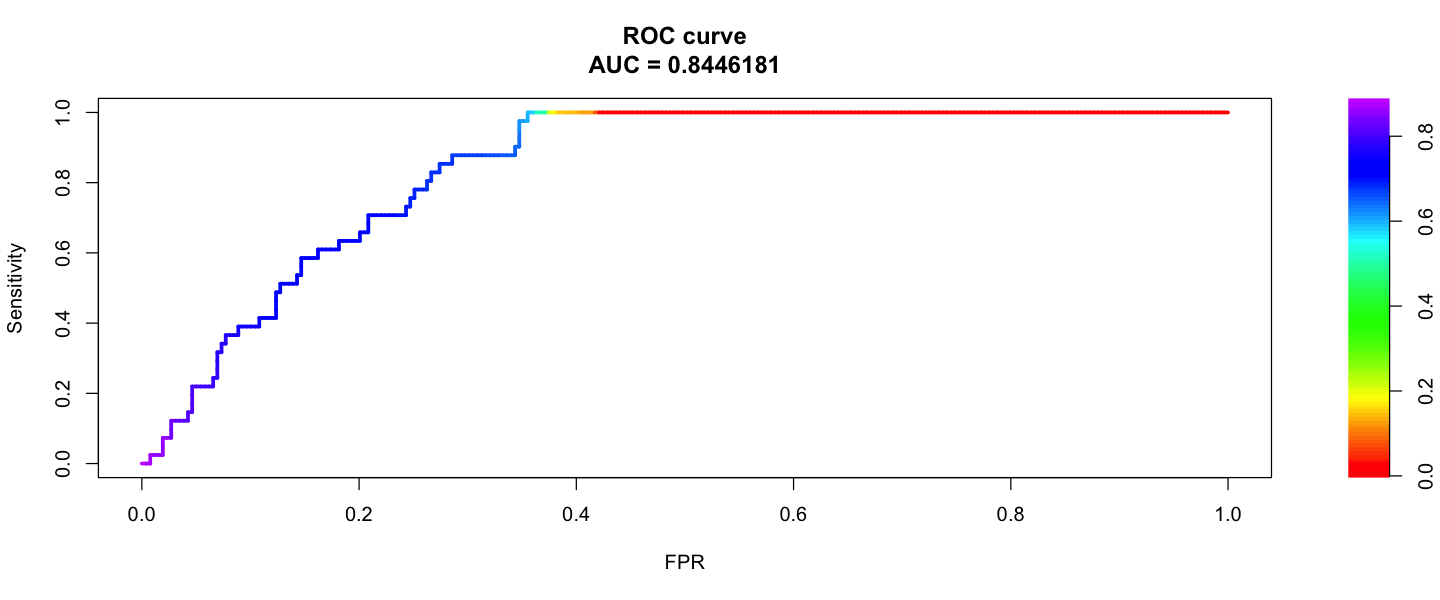

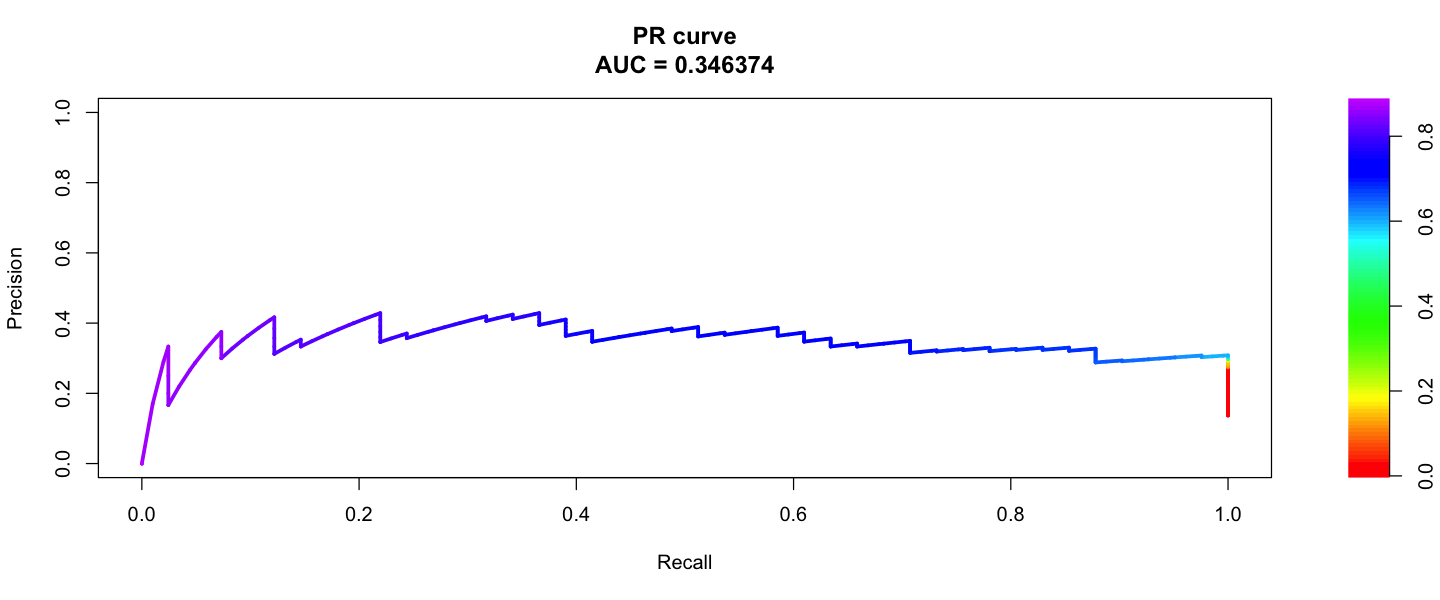

In [72]:
library(PRROC)
logit.stan.roc <- roc.curve(weights.class0=y_test, scores.class0=logit.stan.preds[,1], curve=TRUE)
plot(logit.stan.roc)
logit.stan.pr <- pr.curve(weights.class0=y_test, scores.class0=logit.stan.preds[,1], curve=TRUE)
plot(logit.stan.pr)

In [ ]:
#model <- randomForest(class ~ ., data = dt, importance = TRUE, ntree=500, strata=dt$class, sampsize=c(19,19)) 

#model
#varImpPlot(model,type=2)

### RStan

For RStan and JAGS we need to combine all variables into a list and state also the number of rows of our dataset. 

In [31]:
dfCombined <- as.list(df[, c('Gender','Age','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage',
                             'Annual_Premium','Vintage','Response')])
dfCombined$nrows <- nrow(df)

In [28]:
stan <- paste(" 
data {
    int<lower=0> nrows; //Number of data items
    int<lower=0,upper=1> Response[nrows]; //Outcome vector
    //Predictors
    vector[nrows] Gender;
    vector[nrows] Age;
    vector[nrows] Driving_License;
    vector[nrows] Previously_Insured;
    vector[nrows] Vehicle_Age;
    vector[nrows] Vehicle_Damage;
    vector[nrows] Annual_Premium;
    vector[nrows] Vintage;

}
parameters {
  vector[9] b; //Coefficients for predictors
}
model {
  Response ~ bernoulli_logit(b[9] + b[2] * Gender + b[3] * Age + b[4] * Driving_License + b[5] * Previously_Insured + 
        b[6] * Vehicle_Age + b[7] * Vehicle_Damage + b[8] * Vintage);
  for(i in 1:9){
    b[i] ~ normal(0, 3); 
  }
}

")
writeLines(stan, "model_stan")    

In [23]:
library("rstan")

In [32]:
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

In [33]:
stan_model <- stan(file = "model_stan",  
           data = dfCombined,         
           pars = c("b"),     
           chains = 4,        
           iter = 2000,       
           seed = 123)  

recompiling to avoid crashing R session



In [19]:
colnames(df)

[1] "Gender"             "Age"                "Driving_License"   
[4] "Previously_Insured" "Vehicle_Age"        "Vehicle_Damage"    
[7] "Annual_Premium"     "Vintage"            "Response"

In [35]:
summary(stan_model)

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
b[1],0.08619152,0.056972029,2.99054276,-5.9276967,-1.89051843,0.08338914,2.048268e+00,6.0319584,2755.349,1.0003068
b[2],-0.01215147,0.001200739,0.06427773,-0.1362203,-0.05488413,-0.01266952,3.128259e-02,0.1118174,2865.655,0.9996138
b[3],-0.33592351,0.002117026,0.08724257,-0.5079945,-0.39372445,-0.33720985,-2.769614e-01,-0.1699277,1698.261,1.0011938
b[4],2.43915864,0.058142661,1.86369148,0.1086765,0.98423281,2.01106368,3.472629e+00,6.9496655,1027.444,1.0002488
b[5],-2.10335372,0.009743403,0.34681922,-2.9129760,-2.29695853,-2.07350865,-1.867943e+00,-1.5403579,1267.025,1.0026183
b[6],0.69658822,0.002268633,0.09628761,0.5155472,0.62759284,0.69640528,7.611394e-01,0.8897071,1801.408,1.0016069
b[7],0.96773478,0.002562843,0.13396820,0.7104116,0.87804757,0.96358362,1.053923e+00,1.2411701,2732.496,1.0002148
b[8],-0.04893468,0.001265520,0.06128639,-0.1681941,-0.08984567,-0.05019468,-7.220252e-03,0.0728337,2345.255,1.0033553
b[9],-1.17953355,0.006825038,0.22932607,-1.7102093,-1.31897138,-1.15452497,-1.018868e+00,-0.7995647,1129.007,1.0023082
lp__,-811.01501406,0.058183374,2.15531784,-816.0580666,-812.23722540,-810.67312044,-8.094065e+02,-807.8310714,1372.223,1.0045093


In [37]:
library("BayesPostEst")

Warning message:
"package 'BayesPostEst' was built under R version 4.0.5"


In [38]:
mcmcTab(stan_model)

Variable,Median,SD,Lower,Upper
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
b[1],0.083,2.991,-5.928,6.032
b[2],-0.013,0.064,-0.136,0.112
b[3],-0.337,0.087,-0.508,-0.170
b[4],2.011,1.864,0.109,6.950
b[5],-2.074,0.347,-2.913,-1.540
b[6],0.696,0.096,0.516,0.890
b[7],0.964,0.134,0.710,1.241
b[8],-0.050,0.061,-0.168,0.073
b[9],-1.155,0.229,-1.710,-0.800


In [39]:
mcmcTab(stan_model, Pr = TRUE)

Variable,Median,SD,Lower,Upper,Pr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
b[1],0.083,2.991,-5.928,6.032,0.509
b[2],-0.013,0.064,-0.136,0.112,0.575
b[3],-0.337,0.087,-0.508,-0.170,1.000
b[4],2.011,1.864,0.109,6.950,0.997
b[5],-2.074,0.347,-2.913,-1.540,1.000
b[6],0.696,0.096,0.516,0.890,1.000
b[7],0.964,0.134,0.710,1.241,1.000
b[8],-0.050,0.061,-0.168,0.073,0.782
b[9],-1.155,0.229,-1.710,-0.800,1.000


In [40]:
matrix_stan <- as.matrix(stan_model)

In [41]:
mm <- model.matrix(Response ~ Gender + Age + Driving_License + Previously_Insured + 
                         Vehicle_Age + Vehicle_Damage + Annual_Premium + Vintage,
                   data = df)

In [75]:
aveprob.Insured.stan <- mcmcAveProb(modelmatrix = mm,
            mcmcout = matrix_stan[, 1:ncol(mm)],
            xcol = 4,
            xrange = c(0, 1),
            link = "logit",
            ci = c(0.025, 0.975),
            fullsims = TRUE)

Picking joint bandwidth of 0.0298



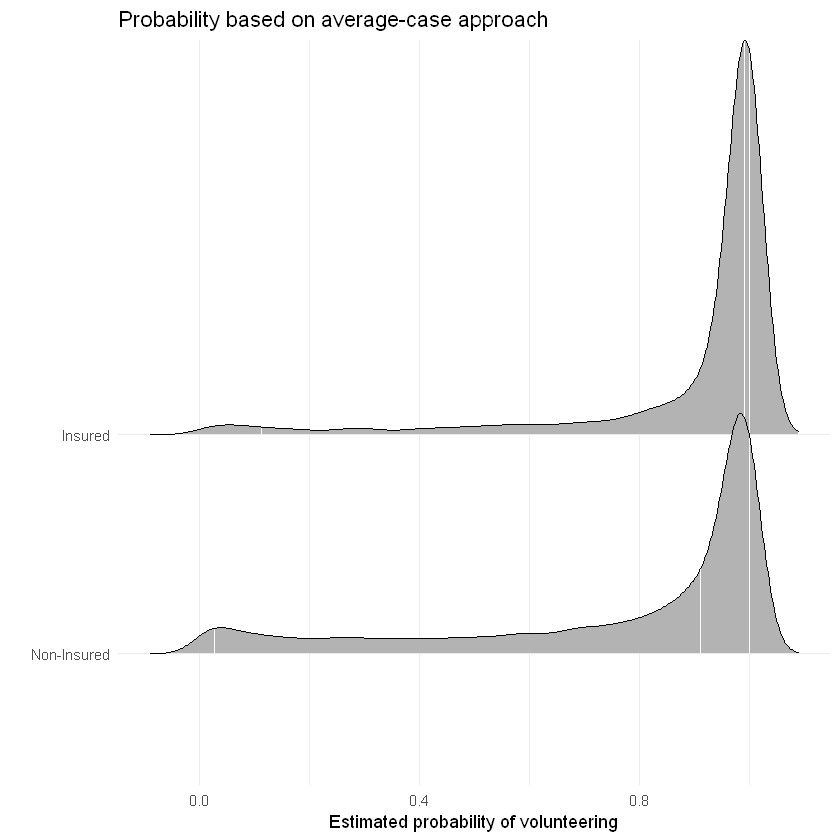

In [76]:
library("ggplot2")
library("ggridges")
ggplot(data = aveprob.Insured.stan, 
       aes(y = factor(x), x = pp)) + 
  stat_density_ridges(quantile_lines = TRUE, 
                quantiles = c(0.025, 0.5, 0.975), vline_color = "white") + 
  scale_y_discrete(labels = c("Non-Insured", "Insured")) + 
  ylab("") + 
  xlab("Estimated probability of volunteering") + 
  labs(title = "Probability based on average-case approach") +
  theme_minimal()

In [28]:
colnames(df)

[1] "Gender"             "Age"                "Driving_License"   
[4] "Previously_Insured" "Vehicle_Age"        "Vehicle_Damage"    
[7] "Annual_Premium"     "Vintage"            "Response"

In [53]:
aveprob.Vehicle_Age.stan <- mcmcAveProb(modelmatrix = mm,
            mcmcout = matrix_stan[, 1:ncol(mm)],
            xcol = 5,
            xrange = seq(min(df$Vehicle_Age), max(df$Vehicle_Age), length.out = 20),
            link = "logit",
            ci = c(0.025, 0.975),
            fullsims = FALSE)

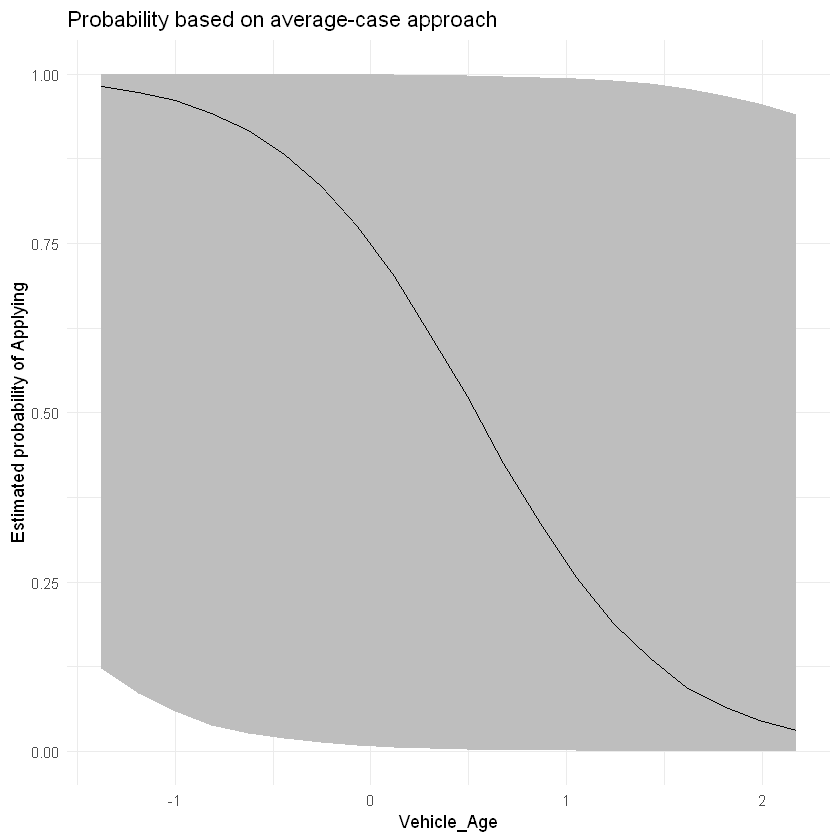

In [54]:
ggplot(data = aveprob.Vehicle_Age.stan, 
       aes(x = x, y = median_pp)) + 
  geom_ribbon(aes(ymin = lower_pp, ymax = upper_pp), fill = "gray") + 
  geom_line() + 
  xlab("Vehicle_Age") + 
  ylab("Estimated probability of Applying") + 
  ylim(0, 1) + 
  labs(title = "Probability based on average-case approach") +
  theme_minimal()

In [56]:
fdsum.stan <- mcmcFD(modelmatrix = mm,
                  mcmcout = matrix_stan[, 1:ncol(mm)],
                  link = "logit",
                  ci = c(0.025, 0.975),
                  fullsims = FALSE)
summary(fdsum.stan)

   median_fd             lower_fd             upper_fd         
 Min.   :-0.5687908   Min.   :-0.8750268   Min.   :-0.0100550  
 1st Qu.:-0.0506125   1st Qu.:-0.2427741   1st Qu.:-0.0002056  
 Median :-0.0004644   Median :-0.0307555   Median : 0.0028532  
 Mean   :-0.0538745   Mean   :-0.1998843   Mean   : 0.1102380  
 3rd Qu.: 0.0238401   3rd Qu.: 0.0001256   3rd Qu.: 0.1072720  
 Max.   : 0.1934150   Max.   : 0.0013045   Max.   : 0.5264432  
   VarName              VarID     
 Length:8           Min.   :1.00  
 Class :character   1st Qu.:2.75  
 Mode  :character   Median :4.50  
                    Mean   :4.50  
                    3rd Qu.:6.25  
                    Max.   :8.00  

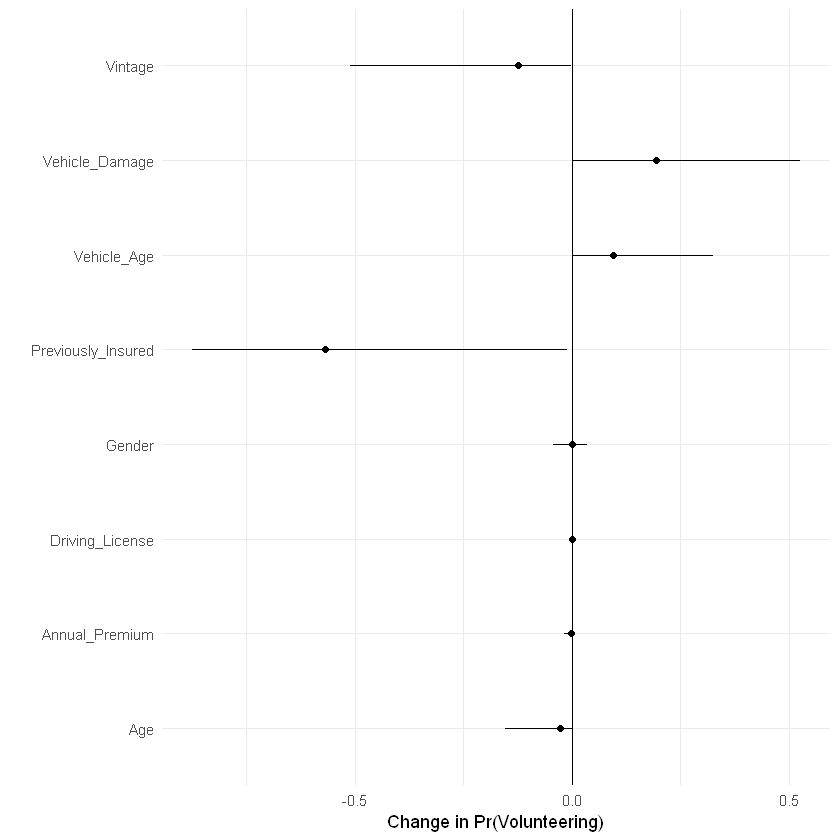

In [57]:
ggplot(data = fdsum.stan, 
       aes(x = median_fd, y = VarName)) + 
  geom_point() + 
  geom_segment(aes(x = lower_fd, xend = upper_fd, yend = VarName)) + 
  geom_vline(xintercept = 0) + 
  xlab("Change in Pr(Volunteering)") + 
  ylab("") +
  theme_minimal()

In [61]:
fitstats <- mcmcRocPrc(object = stan_model,
                       data=dfCombined,
                       yname  = "Response",
                       xnames = c('Gender','Age','Driving_License','Previously_Insured','Vehicle_Age',
                                  'Vehicle_Damage','Annual_Premium','Vintage'),
                       curves = TRUE,
                       fullsims = FALSE)

In [62]:
fitstats$area_under_roc

V1 
0.8304215

In [63]:
fitstats$area_under_prc

V1 
0.7601086

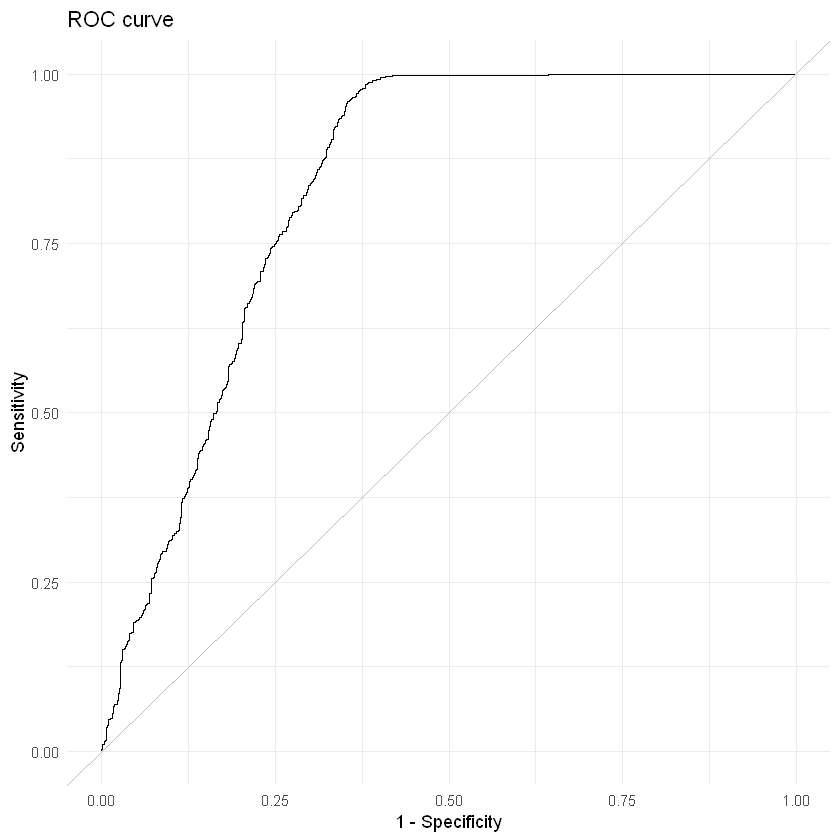

In [64]:
ggplot(data = as.data.frame(fitstats, what = "roc"), aes(x = x, y = y)) +
  geom_line() + 
  geom_abline(intercept = 0, slope = 1, color = "gray") + 
  labs(title = "ROC curve") + 
  xlab("1 - Specificity") + 
  ylab("Sensitivity") +
  theme_minimal()

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


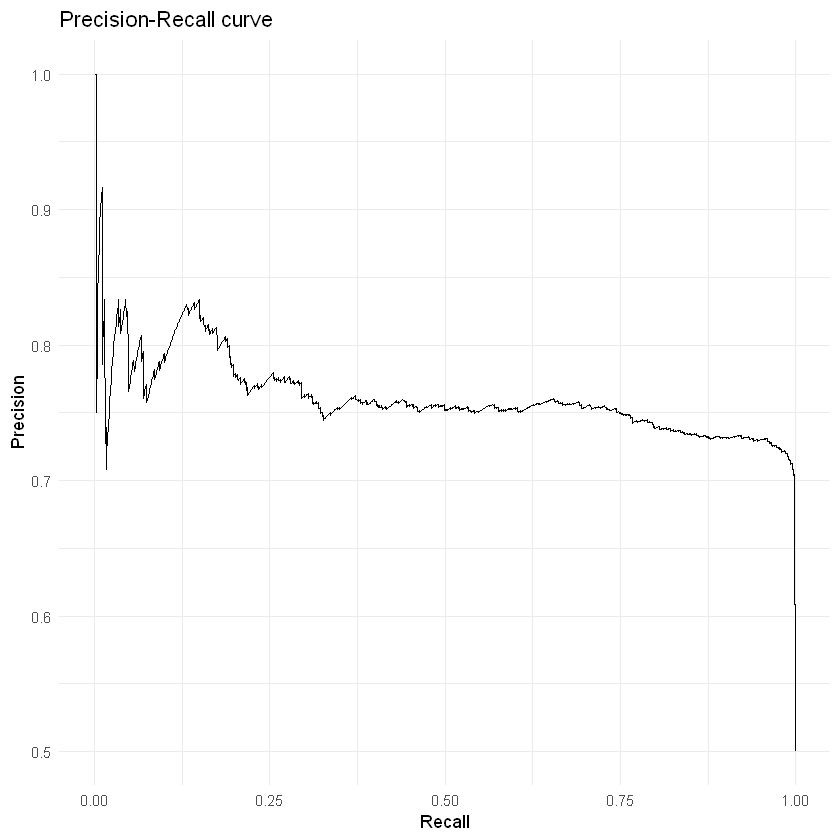

In [65]:
ggplot(data = as.data.frame(fitstats, what = "prc"), aes(x = x, y = y)) +
  geom_line() + 
  labs(title = "Precision-Recall curve") + 
  xlab("Recall") + 
  ylab("Precision") +
  theme_minimal()

In [70]:
fitstats.fullsims <- mcmcRocPrc(object = stan_model,
                        data = dfCombined,
                        yname  = "Response",
                        xnames = c('Gender','Age','Driving_License','Previously_Insured','Vehicle_Age',
                                  'Vehicle_Damage','Annual_Premium','Vintage'),
                        curves = FALSE,
                        fullsims = TRUE)

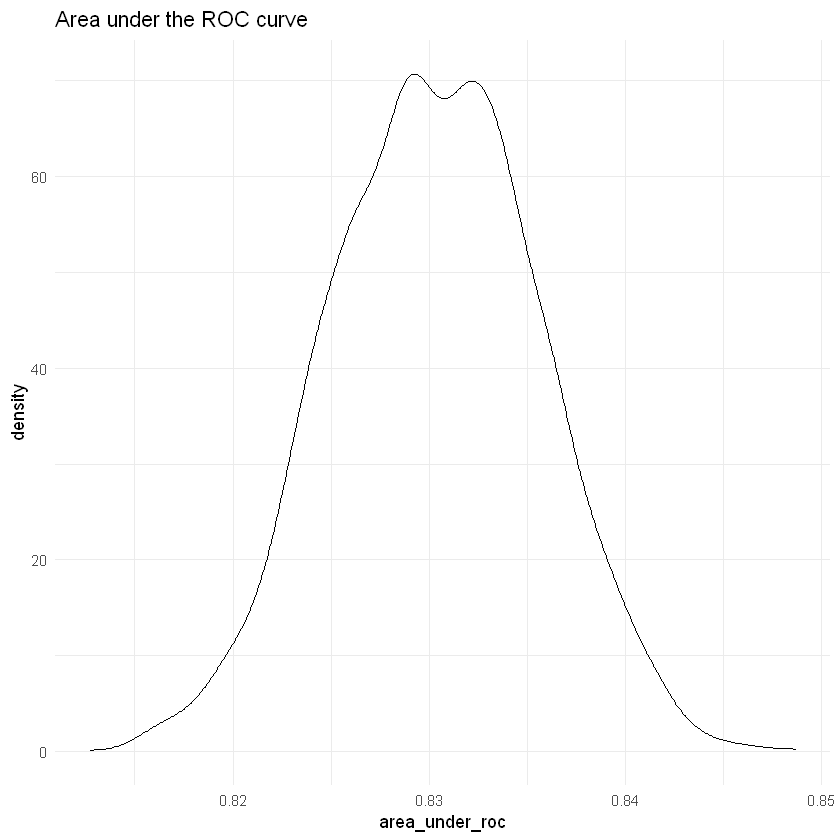

In [71]:
ggplot(as.data.frame(fitstats.fullsims), 
       aes(x = area_under_roc)) +
  geom_density() +
  labs(title = "Area under the ROC curve") +
  theme_minimal()

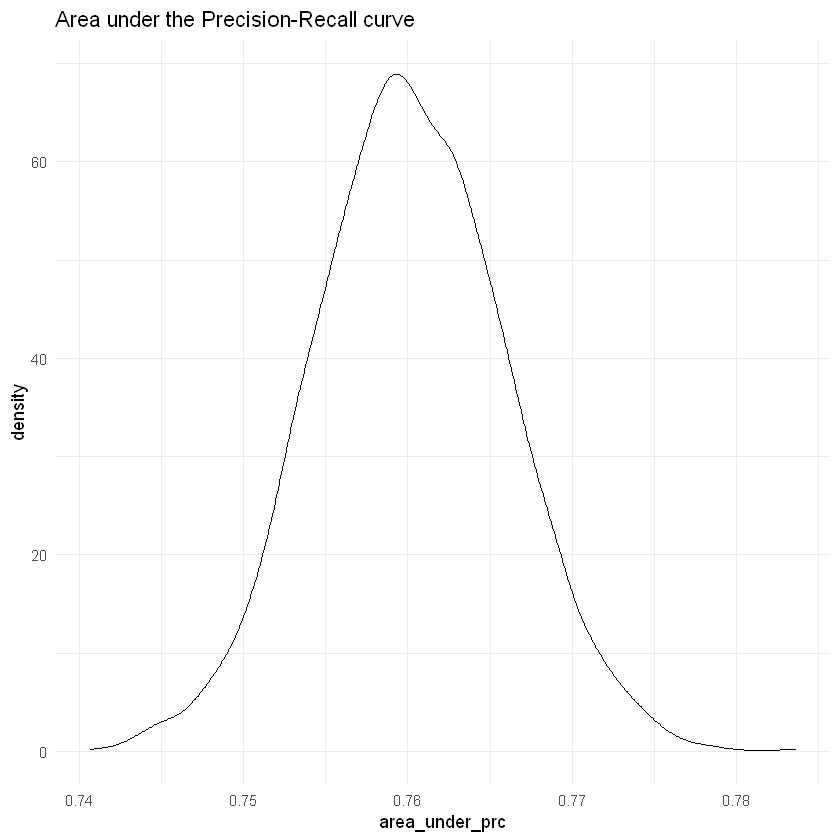

In [72]:
ggplot(as.data.frame(fitstats.fullsims), 
       aes(x = area_under_prc)) +
  geom_density() +
  labs(title = "Area under the Precision-Recall curve") +
  theme_minimal()